HW 

·load data (bank.csv, smaller sample), normalize, and devide training/test sets
·randomly select 2 or 3 features
·apply the methods covered in Ch. 3 with SK-learn (logistic regress, SVM, decision tree, etc)
·check the accuracy and plot the outcome
·repeat above to find better feature
·commit the best result and don't foget to sync to the repository

In [89]:
from sklearn import datasets
from sklearn import preprocessing
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl

In [90]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [91]:
data = pd.read_csv('bank.csv',header=0,sep=';')

In [92]:
data.replace([ 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student',
              'technician','unemployed','unknown'],[0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)
data.replace([ 'divorced','married','single','unknown'],[0,1,2,3], inplace=True)
data.replace(["unknown","secondary","primary","tertiary"],[0,1,2,3],inplace=True)
data.replace(["yes","no"],[1,0],inplace=True)
data.replace(["unknown","telephone","cellular"],[0,1,2],inplace=True)
data.replace(["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov", "dec"],[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)
data.replace(["other","failure","success"],[0,1,2],inplace=True)
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,2,0,1787,0,0,2,19,10,79,1,-1,0,11,0
1,33,7,1,1,0,4789,1,1,2,11,5,220,1,339,4,1,0
2,35,4,2,3,0,1350,1,0,2,16,4,185,1,330,1,1,0
3,30,4,1,3,0,1476,1,1,11,3,6,199,4,-1,0,11,0
4,59,1,1,1,0,0,1,0,11,5,5,226,1,-1,0,11,0


In [93]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, [1, 15]].values
y = data.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.8850405305821666


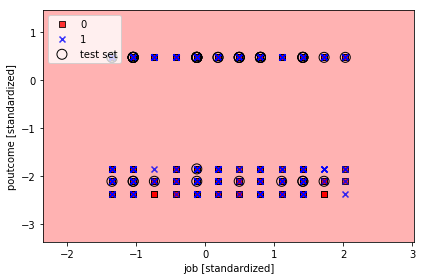

In [95]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
score = accuracy_score(y_test, y_pred)
print (score)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr,test_idx=range(105, 150))
plt.xlabel('job [standardized]')
plt.ylabel('poutcome [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Misclassified samples: 156
Accuracy: 0.89


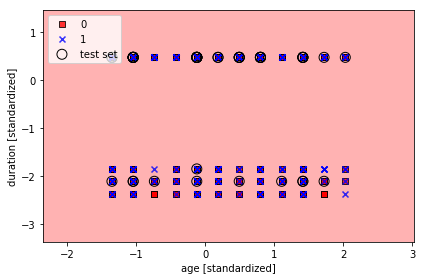

In [96]:
from sklearn.svm import SVC

y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('age [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Misclassified samples: 156
Accuracy: 0.89


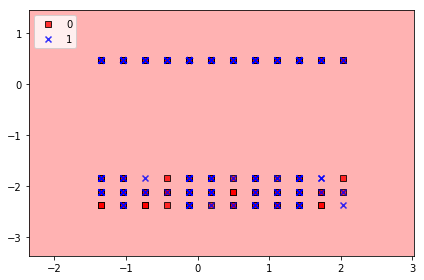

In [97]:
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_train_std, y_train,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_14.png', dpi=300)
plt.show()

0.8938835666912307


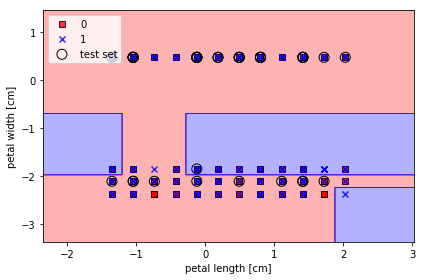

In [98]:
from sklearn.tree import DecisionTreeClassifier

y_pred = tree.predict(X_test_std)
score = accuracy_score(y_test, y_pred)
print (score)

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train_std, y_train)

X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

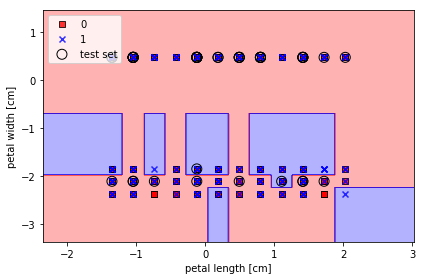

In [99]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train_std, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_22.png', dpi=300)
plt.show()

0.8813559322033898


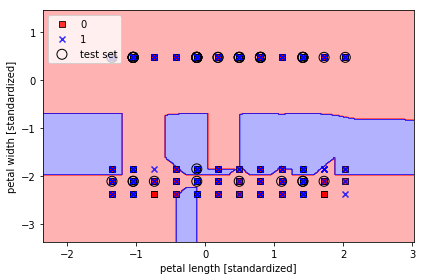

In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)


y_pred = knn.predict(X_test_std)
score = accuracy_score(y_test, y_pred)
print (score)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()